First we are going to import required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

Now importing the dataset from the given GitHub link to the Data Frame

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

As above we found that our dataset is having 614 Rows and 13 Columns including Target variable, with missing values in many columns and of Object, Integer & Float data types.

We also observed that the Dependents column is having the "+" operator symbol also in some of its Rows. So first we are eliminating these "+" symbols before filling the missing values.

In [6]:
df['Dependents']=df['Dependents'].str.replace('+','')

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df=df.fillna(df.mode().iloc[0])

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now no missing values are in our dataset, as we have filled the missing values by first Mode of the respective columns.

In [11]:
df['Dependents']=df['Dependents'].astype(int)

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have changed the data type of "Dependents" column from Oject to Integer. And going to drop the "Loan_ID" column, because "Loan_ID" is not required for the Loan Status prediction as per our opinion.

In [13]:
df.drop('Loan_ID',axis=1,inplace=True)

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


By using label encoder, we are converting the object data types values to numeric values to make these readable for machine learning model.

In [15]:
le=sklearn.preprocessing.LabelEncoder()

In [16]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Now we are going for the Non Graphical & Graphical Analysis

In [18]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

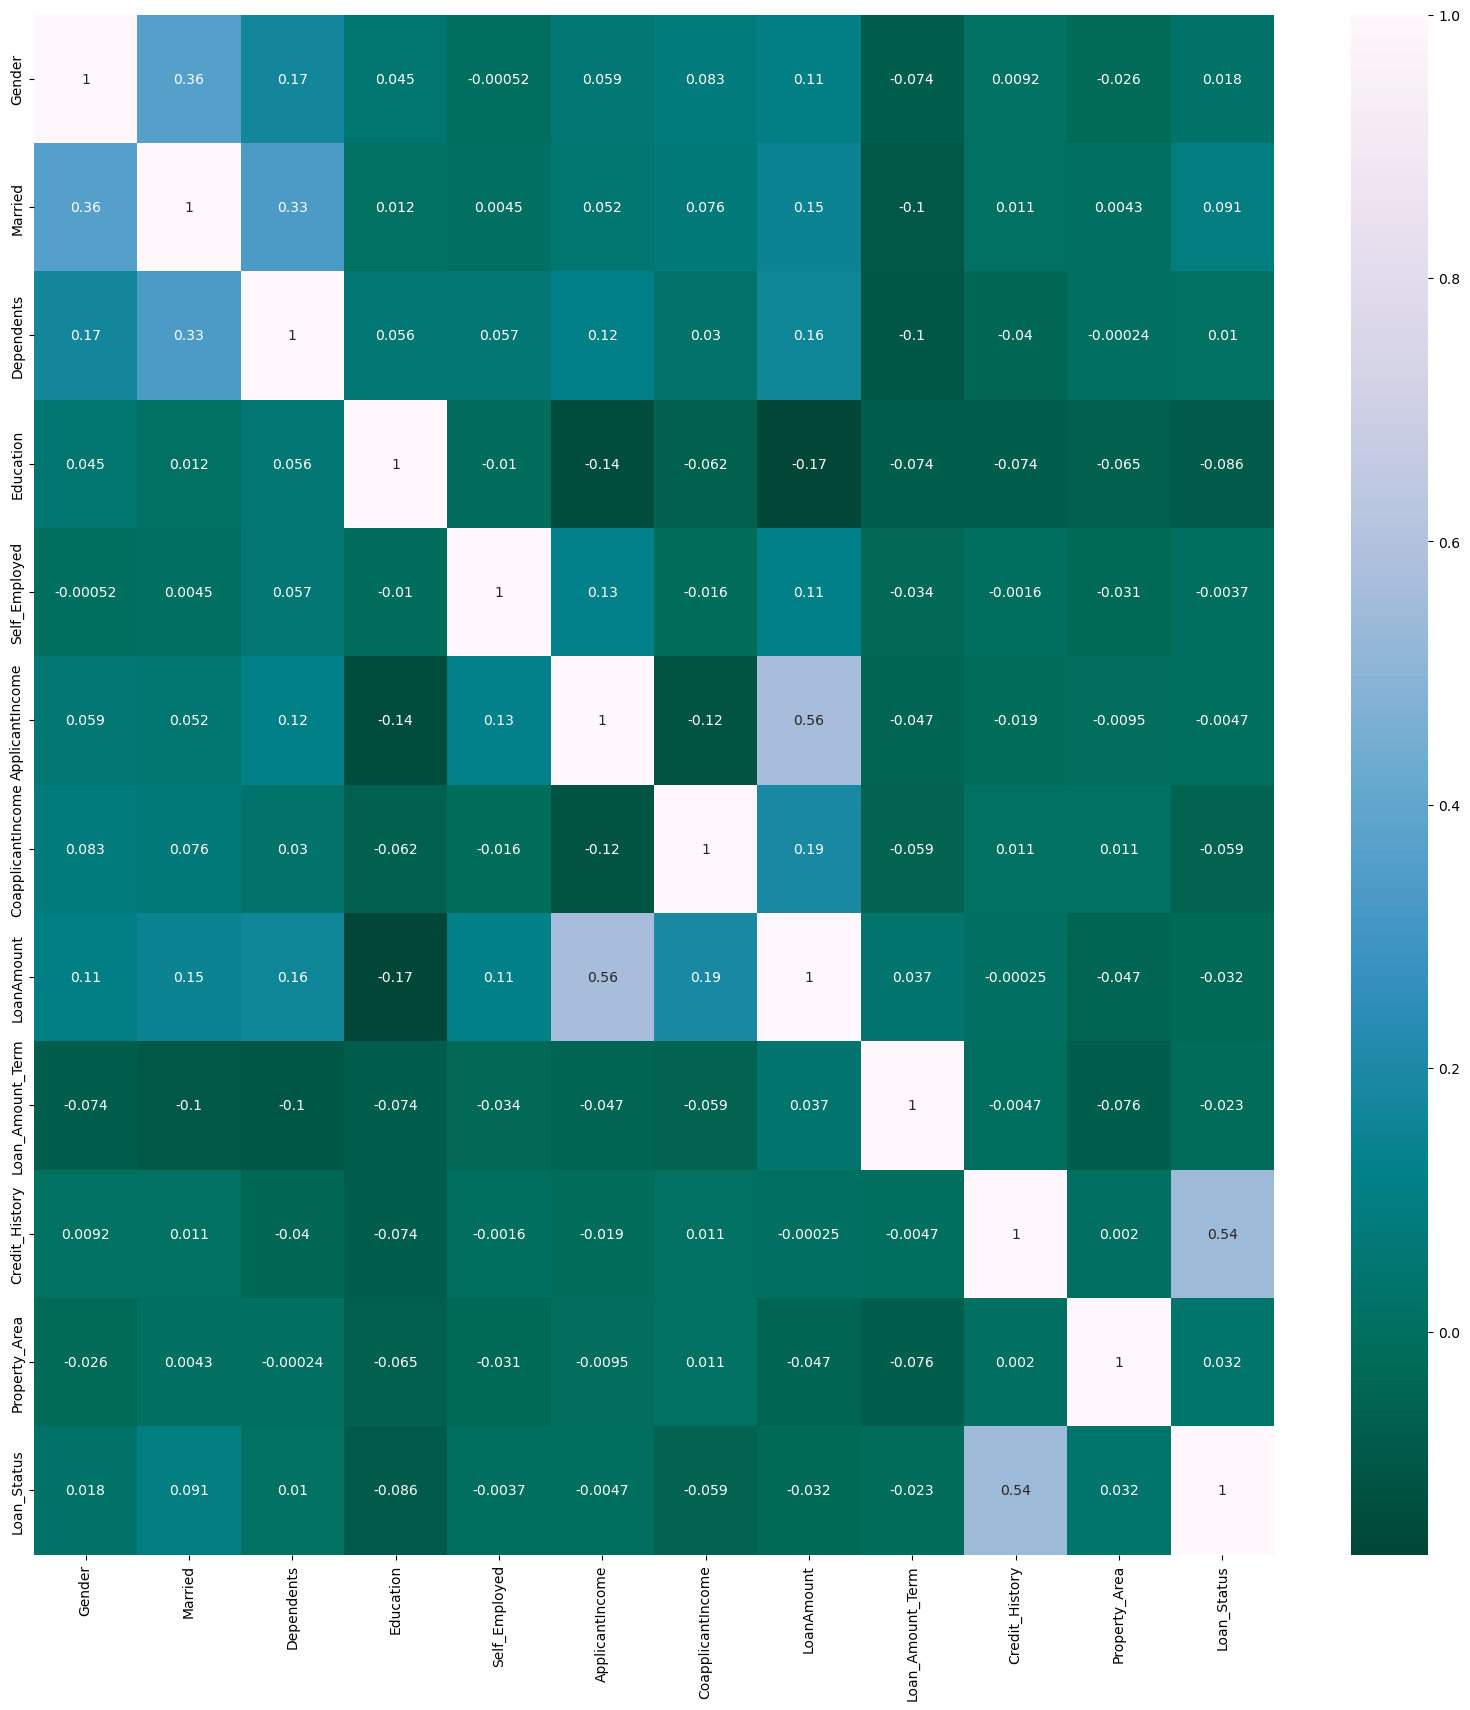

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='PuBuGn_r')

By above corelation data and heatmap, we found that the "Credit_History" is more corelated with our target variable "Loan_Status" than other independent variables, which are not very strongly corelated with the target variable either Positively or Negatively.

In [20]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


As above, we observed that in some columns the Mean & Median (50% Percentile) are lying nearby but for some features there are difference between these two, so possibilies of skewness are there for those columns. Also the standard deviations of few columns are little high and the difference between min & 25% percentile and 75% percentile & max values are high for some the columns, so outliers possibilities are there. We can check the same more correctly by using the boxplots also.

In [21]:
df.shape

(614, 12)

Gender                  AxesSubplot(0.125,0.53;0.110714x0.35)
Married              AxesSubplot(0.257857,0.53;0.110714x0.35)
Dependents           AxesSubplot(0.390714,0.53;0.110714x0.35)
Education            AxesSubplot(0.523571,0.53;0.110714x0.35)
Self_Employed        AxesSubplot(0.656429,0.53;0.110714x0.35)
ApplicantIncome      AxesSubplot(0.789286,0.53;0.110714x0.35)
CoapplicantIncome       AxesSubplot(0.125,0.11;0.110714x0.35)
LoanAmount           AxesSubplot(0.257857,0.11;0.110714x0.35)
Loan_Amount_Term     AxesSubplot(0.390714,0.11;0.110714x0.35)
Credit_History       AxesSubplot(0.523571,0.11;0.110714x0.35)
Property_Area        AxesSubplot(0.656429,0.11;0.110714x0.35)
Loan_Status          AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

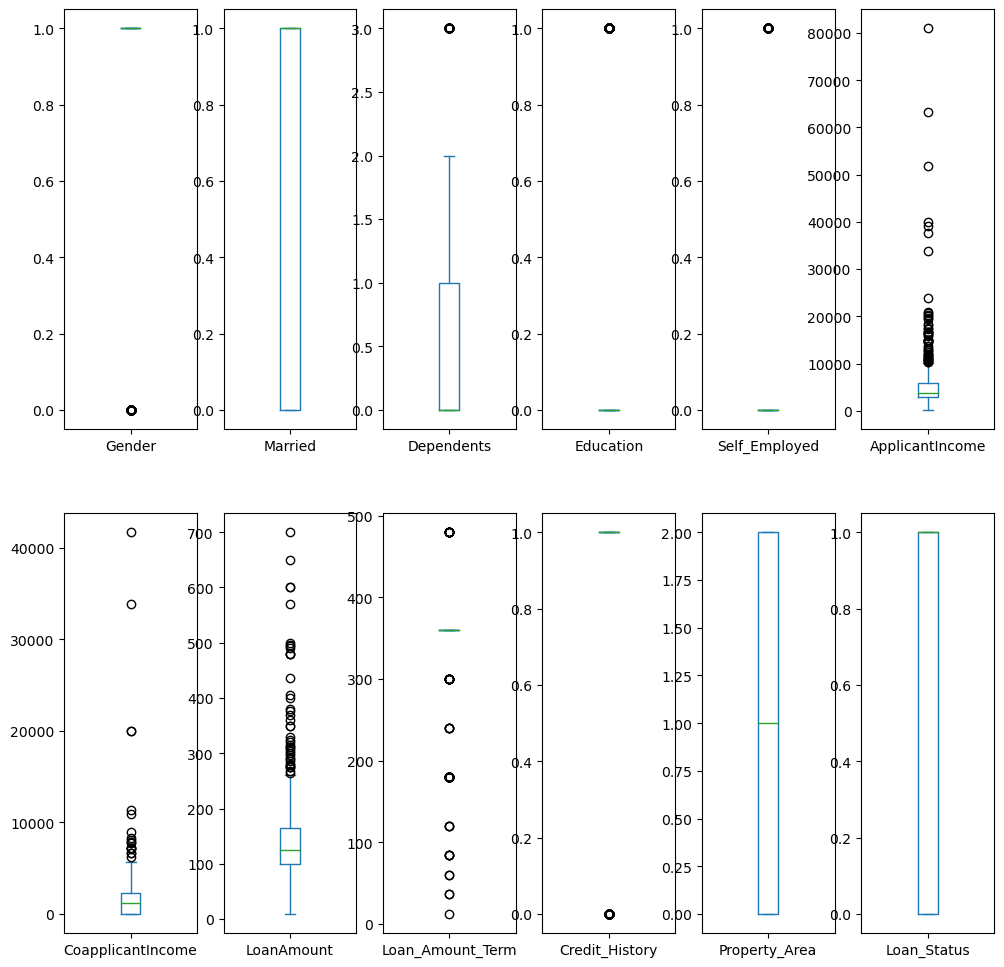

In [22]:
df.plot(kind='box',figsize=(12,12),layout=(2,6),subplots=True)

By above boxplots also, we found that there are outliers especially in the Applicant Income, Co Applicant Income & Loan Amount etc.

In [23]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

High skewness are also present in the same columns.

We are going to check the same via distplots here, and will try to overcome of the skewness and outliers by using boxcox method.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

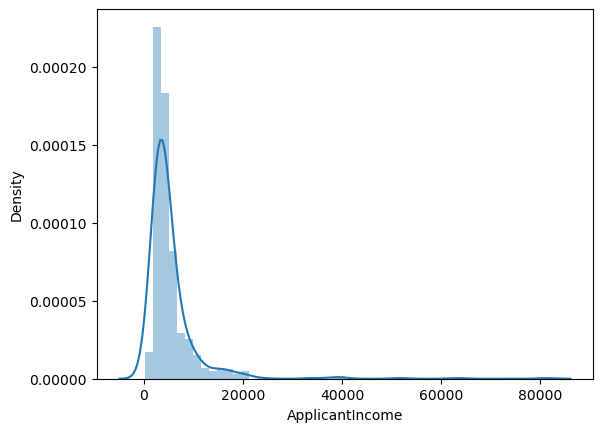

In [24]:
sns.distplot(df['ApplicantIncome'])

In [25]:
df['ApplicantIncome']=boxcox(df['ApplicantIncome'],0)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

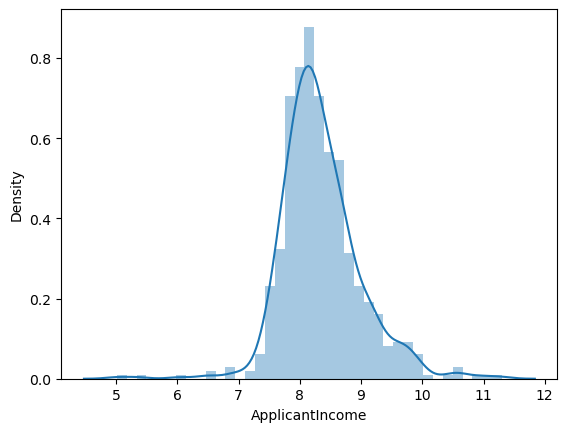

In [26]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

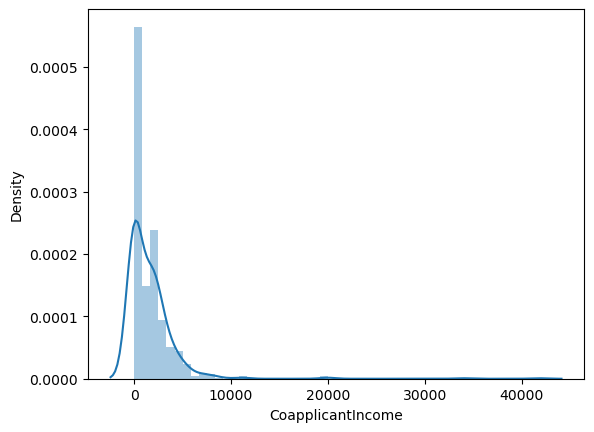

In [27]:
sns.distplot(df['CoapplicantIncome'])

In [28]:
df['CoapplicantIncome']=boxcox(df['CoapplicantIncome'],0.5)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

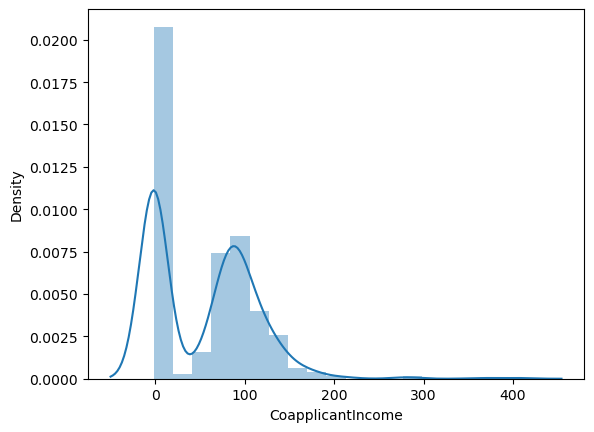

In [29]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

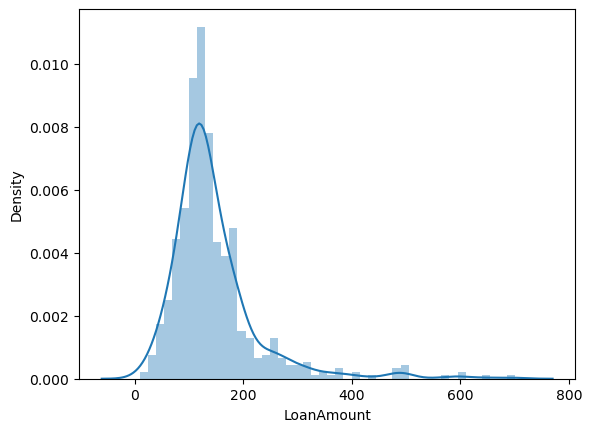

In [30]:
sns.distplot(df['LoanAmount'])

In [31]:
df['LoanAmount']=boxcox(df['LoanAmount'],0.5)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

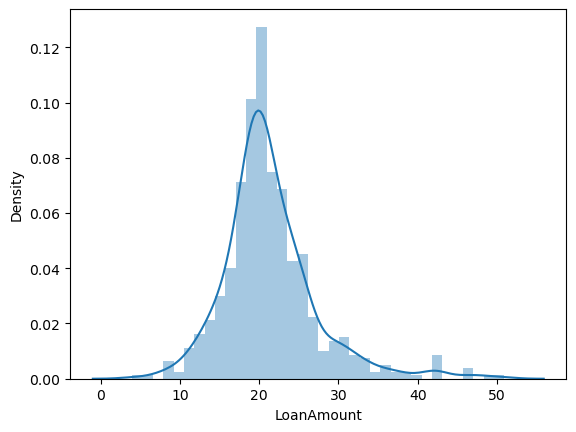

In [32]:
sns.distplot(df['LoanAmount'])

In [33]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount           1.351516
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We have reduced the skewness of numeric columns (i.e. except the catagorical of binary features).

Gender                  AxesSubplot(0.125,0.53;0.110714x0.35)
Married              AxesSubplot(0.257857,0.53;0.110714x0.35)
Dependents           AxesSubplot(0.390714,0.53;0.110714x0.35)
Education            AxesSubplot(0.523571,0.53;0.110714x0.35)
Self_Employed        AxesSubplot(0.656429,0.53;0.110714x0.35)
ApplicantIncome      AxesSubplot(0.789286,0.53;0.110714x0.35)
CoapplicantIncome       AxesSubplot(0.125,0.11;0.110714x0.35)
LoanAmount           AxesSubplot(0.257857,0.11;0.110714x0.35)
Loan_Amount_Term     AxesSubplot(0.390714,0.11;0.110714x0.35)
Credit_History       AxesSubplot(0.523571,0.11;0.110714x0.35)
Property_Area        AxesSubplot(0.656429,0.11;0.110714x0.35)
Loan_Status          AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

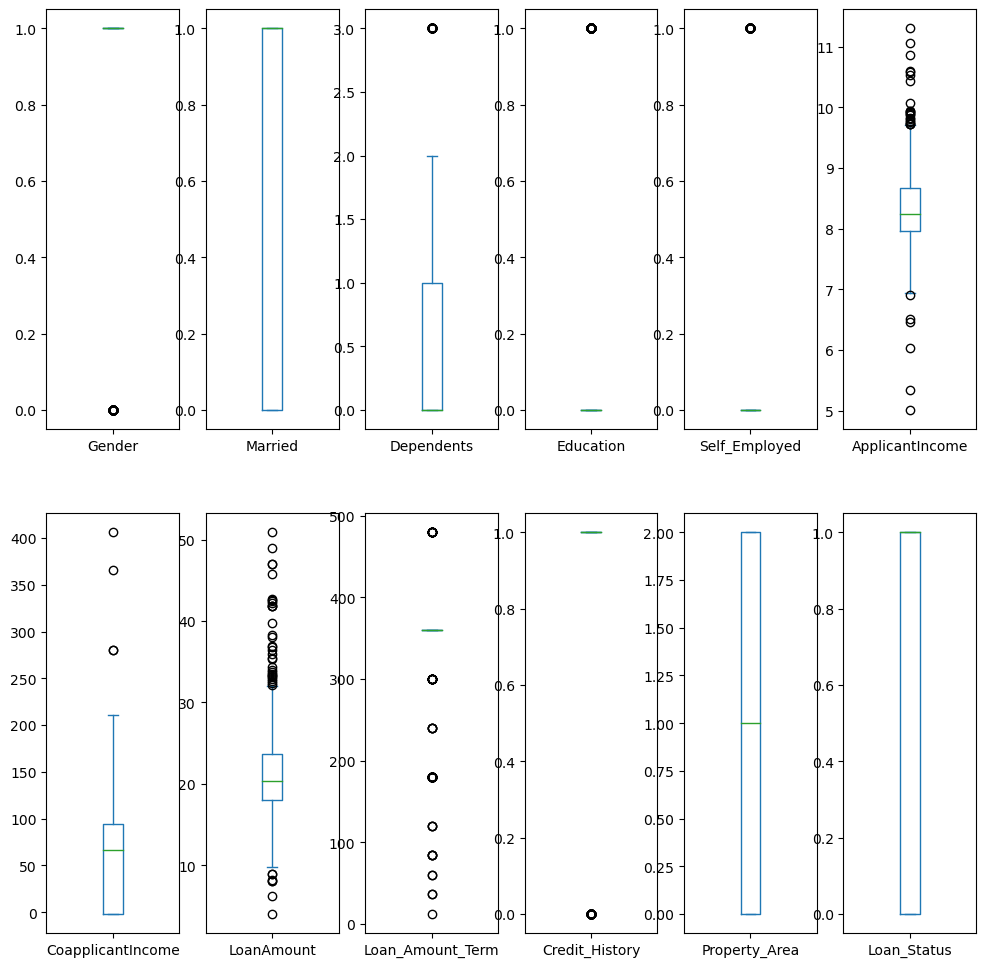

In [34]:
df.plot(kind='box',figsize=(12,12),layout=(2,6),subplots=True)

As above boxplots, the outliers are best possibly reduced of the required numeric features. so rest of the outliers would be eliminating by using the zsocre absolute method.

In [35]:
z=np.abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.516199,0.968111,0.243160,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.137879,0.374245,0.123242,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.519352,0.968111,1.187938,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.751478,0.710457,0.243160,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.555733,0.968111,0.063895,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.571934,0.968111,1.087094,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.032585,0.968111,1.788596,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,1.015830,0.432594,1.409633,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.918903,0.968111,0.664877,0.273231,0.411733,1.223298,0.674519


In [36]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,-2.000000,19.908902,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,75.665951,20.627417,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,-2.000000,14.248077,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,95.118484,19.908902,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,-2.000000,21.748684,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,-2.000000,14.852300,360.0,1.0,0,1
610,1,1,3,0,0,8.320205,-2.000000,10.649111,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,28.983867,29.811947,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,-2.000000,25.349589,360.0,1.0,2,1


We have eliminated the outlier data above zscore value 3 out of the both sides of dataset features. And after removing the outliers, we have lost only 5.7% data of our dataset.

So we are going to separate our cleanded dataset into independent & target variables.

In [37]:
x=cleaned_df.iloc[:,0:-1]

In [38]:
y=cleaned_df.iloc[:,-1]

In [39]:
x.shape

(579, 11)

In [40]:
y.shape

(579,)

We will apply and check different classification algorithms with many random states to get the best one for making our classification ML model.

In [41]:
lg=LogisticRegression()

In [42]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(xtrain,ytrain)
    pred1=lg.predict(xtest)
    ascore=accuracy_score(ytest,pred1)
    print(ascore)

0.8448275862068966
0.8160919540229885
0.8620689655172413
0.7873563218390804
0.8390804597701149
0.867816091954023
0.7931034482758621
0.8103448275862069
0.7816091954022989
0.8333333333333334
0.8505747126436781
0.7816091954022989
0.8218390804597702
0.8218390804597702
0.8448275862068966
0.8045977011494253
0.8275862068965517
0.8103448275862069
0.7873563218390804
0.8735632183908046
0.7701149425287356
0.8390804597701149
0.7931034482758621
0.7988505747126436
0.8160919540229885
0.8275862068965517
0.8160919540229885
0.8218390804597702
0.7816091954022989
0.8563218390804598
0.8333333333333334
0.8160919540229885
0.8218390804597702
0.8275862068965517
0.7758620689655172
0.8218390804597702
0.8333333333333334
0.7873563218390804
0.8563218390804598
0.8448275862068966
0.8390804597701149
0.8160919540229885
0.8275862068965517
0.7988505747126436
0.8563218390804598
0.9022988505747126
0.7988505747126436
0.7758620689655172
0.8103448275862069
0.8275862068965517


In [43]:
dt=DecisionTreeClassifier()

In [44]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    dt.fit(xtrain,ytrain)
    pred2=dt.predict(xtest)
    ascore=accuracy_score(ytest,pred2)
    print(ascore)

0.6954022988505747
0.7528735632183908
0.7183908045977011
0.6839080459770115
0.7298850574712644
0.7586206896551724
0.6724137931034483
0.6896551724137931
0.7298850574712644
0.7011494252873564
0.7873563218390804
0.7126436781609196
0.7241379310344828
0.7011494252873564
0.7241379310344828
0.7586206896551724
0.7183908045977011
0.7528735632183908
0.7126436781609196
0.6781609195402298
0.7298850574712644
0.735632183908046
0.7298850574712644
0.7816091954022989
0.7298850574712644
0.6896551724137931
0.6954022988505747
0.7183908045977011
0.6839080459770115
0.7126436781609196
0.7471264367816092
0.735632183908046
0.6781609195402298
0.735632183908046
0.6839080459770115
0.7413793103448276
0.735632183908046
0.7011494252873564
0.7413793103448276
0.6896551724137931
0.7183908045977011
0.6954022988505747
0.7068965517241379
0.7068965517241379
0.7413793103448276
0.7988505747126436
0.7068965517241379
0.7241379310344828
0.7241379310344828
0.7011494252873564


In [45]:
rf=RandomForestClassifier()

In [46]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rf.fit(xtrain,ytrain)
    pred3=rf.predict(xtest)
    ascore=accuracy_score(ytest,pred3)
    print(ascore)

0.8218390804597702
0.7931034482758621
0.8333333333333334
0.7528735632183908
0.8333333333333334
0.7931034482758621
0.7758620689655172
0.7873563218390804
0.7931034482758621
0.8160919540229885
0.8275862068965517
0.7758620689655172
0.7931034482758621
0.8160919540229885
0.7988505747126436
0.7931034482758621
0.8218390804597702
0.7931034482758621
0.764367816091954
0.8448275862068966
0.7701149425287356
0.8103448275862069
0.7873563218390804
0.8045977011494253
0.7988505747126436
0.8160919540229885
0.7988505747126436
0.8045977011494253
0.7471264367816092
0.8160919540229885
0.8160919540229885
0.7701149425287356
0.7873563218390804
0.8160919540229885
0.7816091954022989
0.7988505747126436
0.8218390804597702
0.7873563218390804
0.8390804597701149
0.8333333333333334
0.8045977011494253
0.8103448275862069
0.8045977011494253
0.7931034482758621
0.8275862068965517
0.8850574712643678
0.7931034482758621
0.7816091954022989
0.8103448275862069
0.7758620689655172


In [47]:
kn=KNeighborsClassifier()

In [48]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    kn.fit(xtrain,ytrain)
    pred4=kn.predict(xtest)
    ascore=accuracy_score(ytest,pred4)
    print(ascore)

0.6781609195402298
0.6436781609195402
0.6206896551724138
0.6551724137931034
0.6781609195402298
0.6264367816091954
0.6436781609195402
0.632183908045977
0.6379310344827587
0.6839080459770115
0.6781609195402298
0.6206896551724138
0.5977011494252874
0.6839080459770115
0.6666666666666666
0.603448275862069
0.6781609195402298
0.6264367816091954
0.6206896551724138
0.7011494252873564
0.603448275862069
0.6436781609195402
0.6551724137931034
0.6379310344827587
0.6609195402298851
0.7011494252873564
0.6436781609195402
0.6379310344827587
0.6091954022988506
0.6436781609195402
0.6264367816091954
0.6494252873563219
0.6436781609195402
0.7183908045977011
0.6666666666666666
0.6551724137931034
0.632183908045977
0.7011494252873564
0.6896551724137931
0.6609195402298851
0.7241379310344828
0.6494252873563219
0.5977011494252874
0.6206896551724138
0.6724137931034483
0.7298850574712644
0.6724137931034483
0.6839080459770115
0.6609195402298851
0.6149425287356322


In [49]:
rg=RidgeClassifier()

In [50]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    rg.fit(xtrain,ytrain)
    pred5=rg.predict(xtest)
    ascore=accuracy_score(ytest,pred5)
    print(ascore)

0.8448275862068966
0.8160919540229885
0.8620689655172413
0.7873563218390804
0.8390804597701149
0.867816091954023
0.7931034482758621
0.8103448275862069
0.7873563218390804
0.8333333333333334
0.8505747126436781
0.7873563218390804
0.8218390804597702
0.8218390804597702
0.8448275862068966
0.8045977011494253
0.8275862068965517
0.8160919540229885
0.7873563218390804
0.8735632183908046
0.7701149425287356
0.8390804597701149
0.7931034482758621
0.7988505747126436
0.8218390804597702
0.8275862068965517
0.8218390804597702
0.8218390804597702
0.7816091954022989
0.8563218390804598
0.8333333333333334
0.8160919540229885
0.8218390804597702
0.8275862068965517
0.7931034482758621
0.8218390804597702
0.8333333333333334
0.7988505747126436
0.8563218390804598
0.8448275862068966
0.8390804597701149
0.8160919540229885
0.8275862068965517
0.7988505747126436
0.8563218390804598
0.9022988505747126
0.7988505747126436
0.7873563218390804
0.8103448275862069
0.8333333333333334


In [51]:
sg=SGDClassifier()

In [52]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    sg.fit(xtrain,ytrain)
    pred6=sg.predict(xtest)
    ascore=accuracy_score(ytest,pred6)
    print(ascore)

0.7413793103448276
0.3390804597701149
0.7011494252873564
0.3390804597701149
0.40229885057471265
0.40229885057471265
0.5229885057471264
0.7068965517241379
0.3218390804597701
0.27586206896551724
0.7126436781609196
0.6724137931034483
0.3448275862068966
0.6896551724137931
0.7413793103448276
0.6839080459770115
0.7068965517241379
0.6839080459770115
0.6724137931034483
0.27011494252873564
0.5919540229885057
0.3045977011494253
0.6896551724137931
0.6724137931034483
0.6954022988505747
0.7068965517241379
0.6896551724137931
0.7068965517241379
0.5574712643678161
0.7528735632183908
0.6781609195402298
0.6724137931034483
0.5804597701149425
0.7183908045977011
0.5862068965517241
0.7126436781609196
0.632183908045977
0.2988505747126437
0.29310344827586204
0.6954022988505747
0.7126436781609196
0.7126436781609196
0.3103448275862069
0.6436781609195402
0.3160919540229885
0.7011494252873564
0.6781609195402298
0.6839080459770115
0.603448275862069
0.3333333333333333


In [53]:
br=BernoulliNB()

In [54]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    br.fit(xtrain,ytrain)
    pred7=br.predict(xtest)
    ascore=accuracy_score(ytest,pred7)
    print(ascore)

0.8448275862068966
0.8160919540229885
0.8620689655172413
0.7873563218390804
0.8390804597701149
0.8620689655172413
0.7931034482758621
0.8103448275862069
0.7873563218390804
0.8333333333333334
0.8448275862068966
0.7873563218390804
0.8218390804597702
0.8218390804597702
0.8448275862068966
0.8045977011494253
0.8275862068965517
0.8103448275862069
0.7873563218390804
0.8735632183908046
0.7528735632183908
0.8390804597701149
0.7931034482758621
0.7988505747126436
0.8045977011494253
0.8275862068965517
0.8218390804597702
0.8218390804597702
0.7816091954022989
0.8505747126436781
0.8333333333333334
0.8160919540229885
0.8218390804597702
0.8275862068965517
0.7931034482758621
0.8218390804597702
0.8333333333333334
0.7988505747126436
0.8563218390804598
0.8505747126436781
0.8390804597701149
0.8160919540229885
0.8275862068965517
0.7988505747126436
0.8448275862068966
0.8908045977011494
0.7988505747126436
0.7873563218390804
0.8103448275862069
0.8333333333333334


In [55]:
gn=GaussianNB()

In [56]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    gn.fit(xtrain,ytrain)
    pred8=gn.predict(xtest)
    ascore=accuracy_score(ytest,pred8)
    print(ascore)

0.8390804597701149
0.8160919540229885
0.8563218390804598
0.7873563218390804
0.8390804597701149
0.867816091954023
0.7873563218390804
0.8103448275862069
0.7873563218390804
0.8390804597701149
0.8505747126436781
0.7068965517241379
0.8160919540229885
0.8218390804597702
0.8448275862068966
0.7758620689655172
0.8275862068965517
0.7988505747126436
0.7873563218390804
0.8735632183908046
0.764367816091954
0.8390804597701149
0.7931034482758621
0.7988505747126436
0.8218390804597702
0.8275862068965517
0.8218390804597702
0.7528735632183908
0.7183908045977011
0.8563218390804598
0.8333333333333334
0.8160919540229885
0.8160919540229885
0.8275862068965517
0.7816091954022989
0.7988505747126436
0.8333333333333334
0.7988505747126436
0.8563218390804598
0.8448275862068966
0.8390804597701149
0.8160919540229885
0.8103448275862069
0.7988505747126436
0.8563218390804598
0.9022988505747126
0.7988505747126436
0.7586206896551724
0.8045977011494253
0.8333333333333334


By using above Algos, we found the best Algo as Ridge Classifier. So going to check the different Cross Validations on Ridge Classifier for more accurate results.

In [57]:
cv1=cross_val_score(rg,x,y,cv=KFold(n_splits=10))

In [58]:
cv1

array([0.75862069, 0.84482759, 0.75862069, 0.79310345, 0.81034483,
       0.82758621, 0.84482759, 0.87931034, 0.79310345, 0.87719298])

In [59]:
cv1.mean()

0.8187537810042347

In [60]:
cv2=cross_val_score(rg,x,y,cv=StratifiedKFold(n_splits=10))

In [61]:
cv2

array([0.81034483, 0.81034483, 0.79310345, 0.79310345, 0.77586207,
       0.79310345, 0.87931034, 0.84482759, 0.81034483, 0.87719298])

In [62]:
cv2.mean()

0.8187537810042347

In [63]:
cv3=cross_val_score(rg,x,y,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [64]:
cv3

array([0.79885057, 0.83908046, 0.81034483, 0.83333333, 0.78735632,
       0.79310345, 0.84482759, 0.83908046, 0.8045977 , 0.7816092 ])

In [65]:
cv3.mean()

0.8132183908045978

By using different Cross Validations, we have got the good prediction accuracy of approximately 81%. So now going to get the best result by using Hyper Parameter Tuning with different Ridge Classifier parameters for our further process of making ML model.

In [66]:
gs=GridSearchCV(estimator=rg,param_grid={'alpha':[0.1,0.5,1.0,2.0],'fit_intercept':[True,False],'solver':['auto','sparse_cg','cholesky','svd','lsqr','saga','sag'],'tol':[1e-4,1e-3,1e-2],'normalize':[True,False]},scoring='accuracy',cv=10)

In [67]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'sparse_cg', 'cholesky', 'svd',
                                    'lsqr', 'saga', 'sag'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [68]:
hypred=gs.best_estimator_.predict(xtest)

In [69]:
accuracy_score(ytest,hypred)

0.8333333333333334

In [70]:
confusion_matrix(ytest,hypred)

array([[ 26,  29],
       [  0, 119]], dtype=int64)

By Hyper Parameter Tuning with different param grids of Ridge Classifier, we got a good prediction accuracy of above 83%, out of which the Loan Rejected status prediction is found with 100% accuracy (True Negative) but the Loan Sanctioned status are lying in both of the predictions of True Positive and False Positive, and that's why our overall prediction accuracy is coming above 83% instead of 100%.

As per our best efforts, we have reached upto above 83% prediction accuracy score, so going to save this Hyper Tuning model as our further ML Model via pickle dump method.

In [71]:
pickle.dump(gs, open('Loan Status', 'wb'))

In [72]:
gs_model=pickle.load(open('Loan Status', 'rb'))

In [73]:
model_pred=gs_model.predict(xtest)

In [74]:
accuracy_score(ytest,model_pred)

0.8333333333333334

Our Classification Machine Learning Model has been saved with the name of "Loan Status" for the loan_status prediction and check with above 83% prediction accuracy.